In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


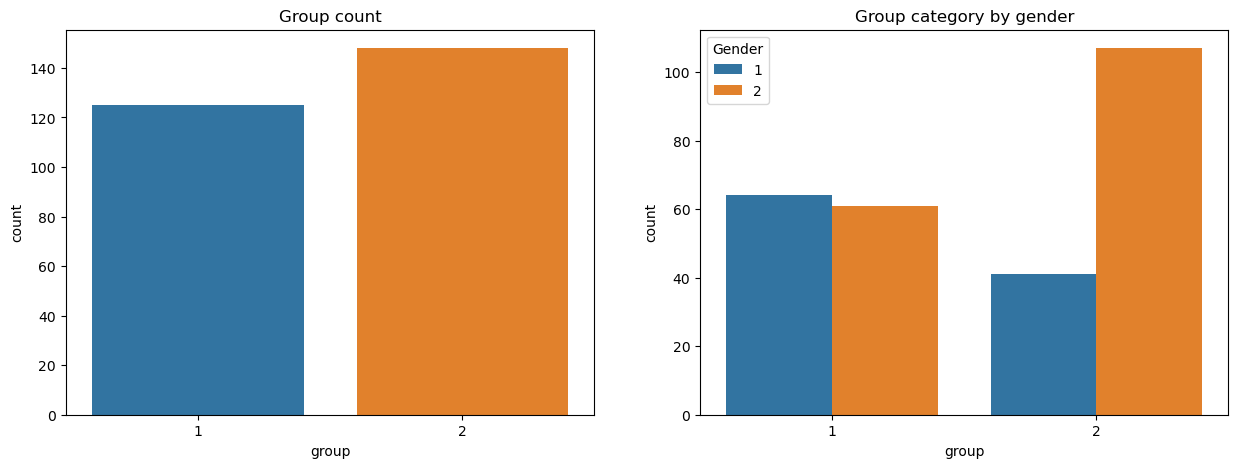

In [3]:
fig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(15,5))
sns.countplot(ax = axes[0],x='group',data = df);
sns.countplot(ax = axes[1],x='group',data = df,hue = 'Gender');

axes[1].title.set_text('Group category by gender')
axes[0].title.set_text('Group count')

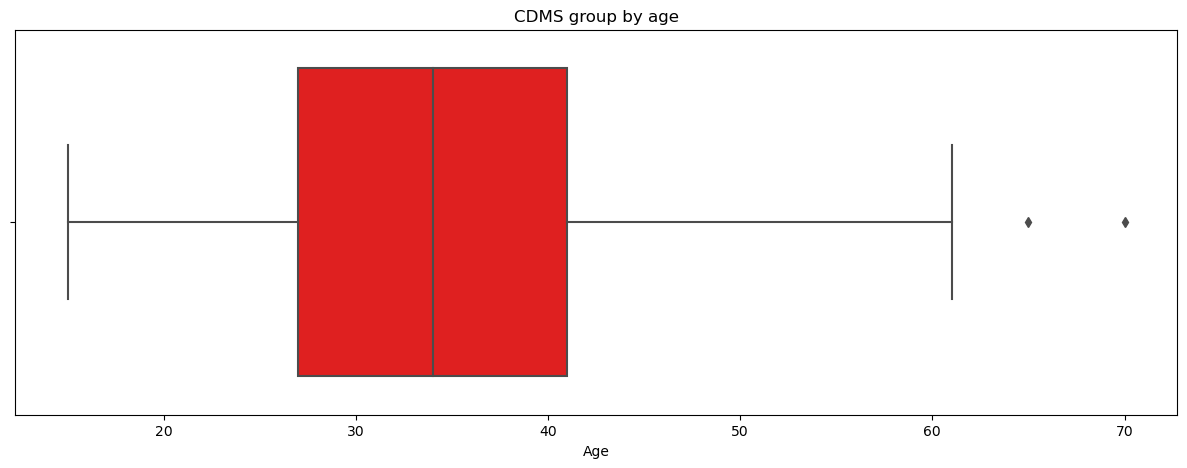

In [4]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Age',data = df[df['group']==1],color = 'red');
plt.title('CDMS group by age');

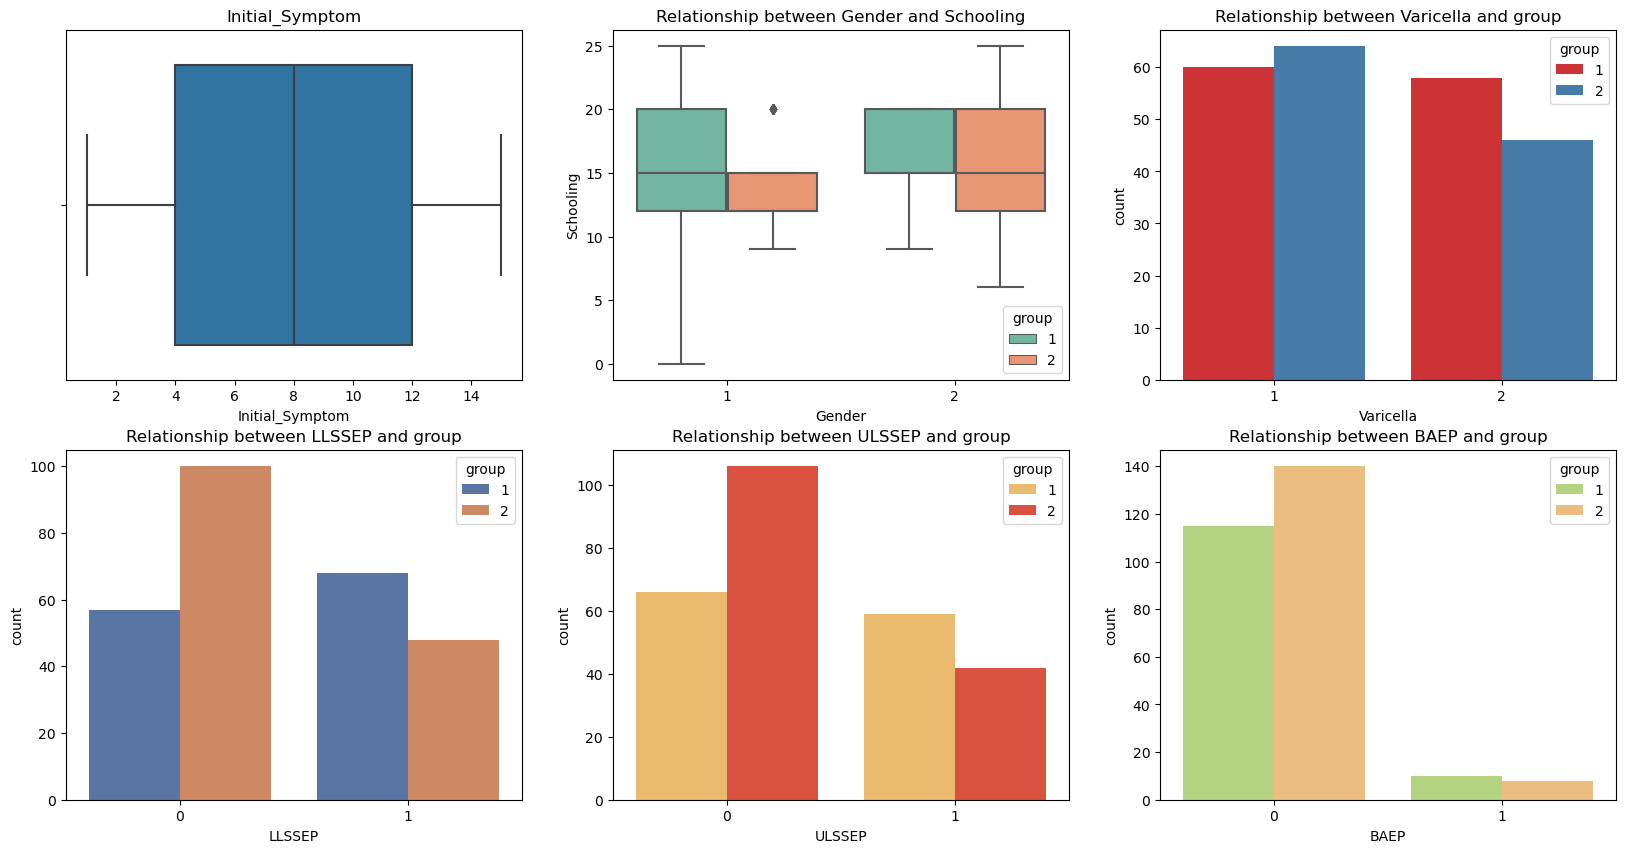

In [5]:
fig,axes  = plt.subplots(nrows = 2,ncols = 3,figsize=(20,10))
sns.boxplot(ax=axes[0,0],x='Initial_Symptom',data = df[df['group']==1])
sns.boxplot(ax = axes[0,1],x='Gender',y='Schooling',data = df,hue = 'group', palette='Set2');
sns.countplot(ax = axes[0,2],x='Varicella',data = df[df['Varicella']!=3],hue = 'group', palette='Set1');

sns.countplot(ax = axes[1,0],x='LLSSEP',data = df,hue = 'group', palette='deep');
sns.countplot(ax = axes[1,1],x='ULSSEP',data = df,hue = 'group', palette='YlOrRd');
sns.countplot(ax= axes[1,2],x='BAEP',data = df,hue = 'group',palette='RdYlGn_r');

axes[0,0].title.set_text('Initial_Symptom')
axes[0,1].title.set_text('Relationship between Gender and Schooling')
axes[0,2].title.set_text('Relationship between Varicella and group')

axes[1,0].title.set_text('Relationship between LLSSEP and group')
axes[1,1].title.set_text('Relationship between ULSSEP and group')
axes[1,2].title.set_text('Relationship between BAEP and group')

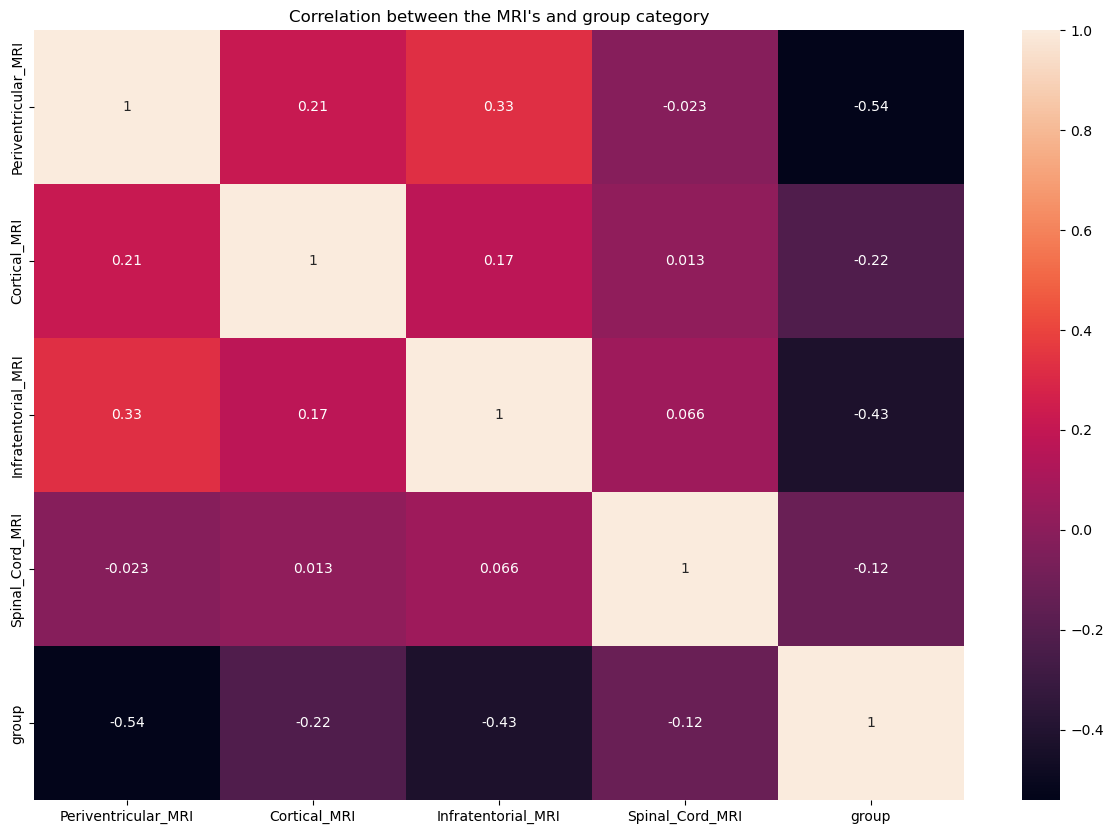

In [6]:
corr =df.loc[:,['Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,annot = True)
plt.title('Correlation between the MRI\'s and group category');

In [7]:
df.drop(columns = ['Unnamed: 0','Initial_EDSS','Final_EDSS'],inplace = True)

In [8]:
df.dropna(inplace = True)
X= df.drop('group',axis=1)
y= df['group']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


The accuracy of Random Forest Classifier is : [0.8169117647058822]


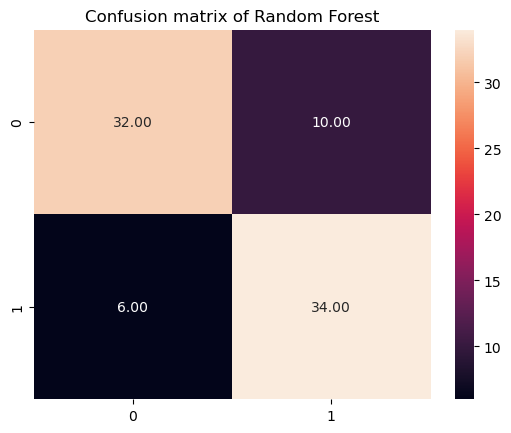

In [11]:
rf_results=[]

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_results.append(np.mean(cross_val_score(rf,X_test,y_test,cv=5)))
print('The accuracy of Random Forest Classifier is :',rf_results)

model_rf = rf.predict(X_test)
model_cms = confusion_matrix(y_test,model_rf)
sns.heatmap(data = model_cms,annot = True,fmt='.2f');
plt.title('Confusion matrix of Random Forest');

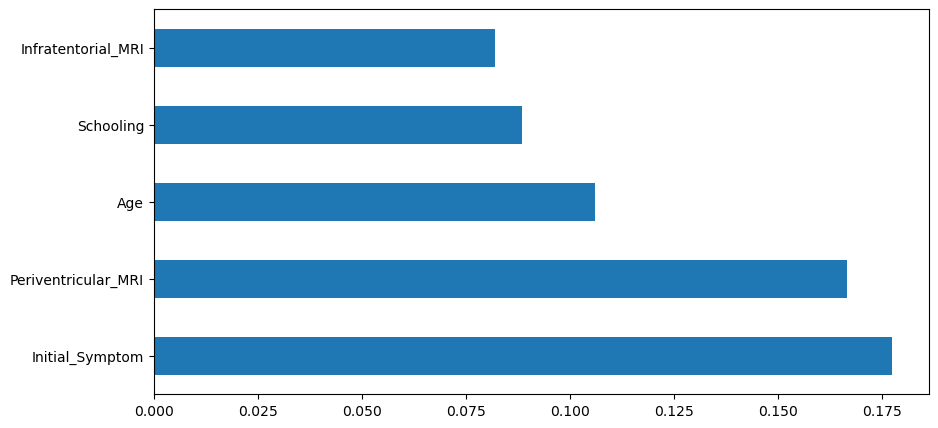

In [12]:
importance = pd.Series(rf.feature_importances_,index = X.columns)
importance.nlargest(5).plot(kind = 'barh',figsize=(10,5));

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler. transform(X_test)

The accuracy for logistic regression is : 0.8292682926829268


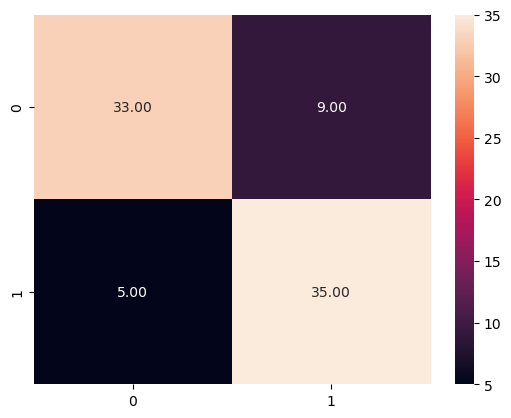

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_predict=log_reg.predict(X_test_scaled)
score_log = log_reg.score(X_test_scaled,y_test)

print('The accuracy for logistic regression is :',score_log)

log = log_reg.predict(X_test_scaled)
model_log = confusion_matrix(y_test,log)
sns.heatmap(data = model_log,annot = True,fmt='.2f');

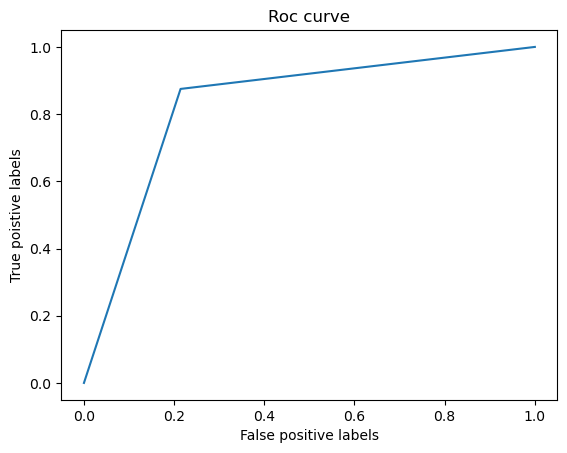

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, log_predict,pos_label = 1)
plt.figure()
plt.plot(tpr, fpr)
plt.xlabel('False positive labels')
plt.ylabel('True poistive labels')
plt.title('Roc curve')
plt.show()

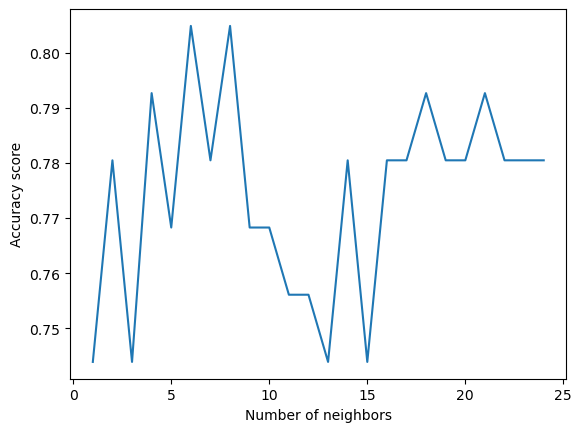

In [16]:
k_range = range(1,25)
knn_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_score.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range, knn_score)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.show()

# Summary

According to the data, men are more prone to developing multiple sclerosis (MS). The most common age range for developing MS is late 20s to early 40s.

The most common initial symptoms of MS occur between 4 and 12, with 8 being the most common. There is a slightly higher chance of developing MS if a person has a positive history of varicella. BAEP is not very important for diagnosis.
There is not a lot of correlation between the group and the types of MRIs when it comes to MS. The only two that had any importance were periventricular MRI and infratentorial MRI, in that order.
Random Forest had the overall best score of 0.85, followed by Logistic Regression with 0.82 and KNN with 0.80. The most important features for machine learning models were:

1. Initial_Symptom
2. Periventricular_MRI
3. Age
4. Schooling
5. Infratentorial_MRI